# Computer Simulations Project

**ICS 4B**

**Group Members:**
- Eric Burugu - EDA (Explaratory Data Analysis)
- Michelle Omondi - Visualization (based on Health_exp_pct_GDP_2016)
- Fiona Ochieng - Visualization  ( based on per_capita_exp_PPP_2016)
- Kevin Kathendu - KMM Modelling (preprocessing and creation of base model)
- Aubrey Omondi - KNN Modelling (improving and evaluating model's performance)

## Exploring Health Systems
There are always these questions in the health sector: What is the best way to run a national health system? Does spending more always lead to better results, or does it matter who spends the money and where it goes? 

By exploring the World Bank data to see which countries spend the highest amounts of their money on their healthcare one may compare spending vz the health indicators or outcome of that country. Of course there is more than one way to spend money on healthcare. Governments often spend most of the money, but people also spend out of pocket money.

Use KNN modelling techniques to categorize the countries which are higher and lower spenders. Give a visualization of your data and categorization result. The exercise is to be done using Python libraries. 

The code used must be clearly documented. 

Hint: You can convert your dataset into categories for easy analysis/classification

**Total score 30 Marks.**

**Instruction**
- The assignment is due on or before 20th August 2020
- The Submission must indicate the name and admission number of the group members.
- The chairperson of the group must indicate what role each member of the group did in the project.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the Health Systems Dataset
health_data = pd.read_csv('Health Systems Dataset.csv')
health_data.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


## Dataset Description

Notes, explanations, etc.

There are countries/regions in the World Bank data not in the Covid-19 data, and countries/regions in the Covid-19 data with no World Bank data. This is unavoidable.
There were political decisions made in both datasets that may cause problems. I chose to go forward with the data as presented, and did not attempt to modify the decisions made by the dataset creators (e.g., the names of countries, what is and is not a country, etc.).
Columns are as follows:

**Country_Region**: the region as used in Kaggle Covid-19 spread data challenges.

**Province_State**: the region as used in Kaggle Covid-19 spread data challenges.

**WorldBankName**: the name of the country used by the World Bank

**HealthexppctGDP2016**: Level of current health expenditure expressed as a percentage of GDP. Estimates of current health expenditures include healthcare goods and services consumed during each year. This indicator does not include capital health expenditures such as buildings, machinery, IT and stocks of vaccines for emergency or outbreaks.

**Healthexppublicpct2016**: Share of current health expenditures funded from domestic public sources for health. Domestic public sources include domestic revenue as internal transfers and grants, transfers, subsidies to voluntary health insurance beneficiaries, non-profit institutions serving households (NPISH) or enterprise financing schemes as well as compulsory prepayment and social health insurance contributions. They do not include external resources spent by governments on health.

**Healthexpoutofpocketpct2016**: Share of out-of-pocket payments of total current health expenditures. Out-of-pocket payments are spending on health directly out-of-pocket by households.

**HealthexppercapitaUSD_2016**: Current expenditures on health per capita in current US dollars. Estimates of current health expenditures include healthcare goods and services consumed during each year.

**percapitaexpPPP2016**: Current expenditures on health per capita expressed in international dollars at purchasing power parity (PPP).

**Externalhealthexppct2016**: Share of current health expenditures funded from external sources. External sources compose of direct foreign transfers and foreign transfers distributed by government encompassing all financial inflows into the national health system from outside the country. External sources either flow through the government scheme or are channeled through non-governmental organizations or other schemes.

**Physiciansper1000_2009-18**: Physicians include generalist and specialist medical practitioners.

**Nursemidwifeper10002009-18**: Nurses and midwives include professional nurses, professional midwives, auxiliary nurses, auxiliary midwives, enrolled nurses, enrolled midwives and other associated personnel, such as dental nurses and primary care nurses.

**Specialistsurgicalper10002008-18**: Specialist surgical workforce is the number of specialist surgical, anaesthetic, and obstetric (SAO) providers who are working in each country per 100,000 population.

**Completenessofbirthreg2009-18**: Completeness of birth registration is the percentage of children under age 5 whose births were registered at the time of the survey. The numerator of completeness of birth registration includes children whose birth certificate was seen by the interviewer or whose mother or caretaker says the birth has been registered.

**Completenessofdeathreg2008-16**: Completeness of death registration is the estimated percentage of deaths that are registered with their cause of death information in the vital registration system of a country.

What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

Inspiration
Does health spending levels (public or private), or hospital staff have any effect on the rate at which Covid-19 spreads in a country? Can we use this data to predict the rate at which Cases or Fatalities will grow?

# Explaratory Data Analysis

In [3]:
# Check the no. of rows and columns
health_data.shape

(210, 14)

In [4]:
# Check the column names
print(health_data.columns)

Index(['Country_Region', 'Province_State', 'World_Bank_Name',
       'Health_exp_pct_GDP_2016', 'Health_exp_public_pct_2016',
       'Health_exp_out_of_pocket_pct_2016', 'Health_exp_per_capita_USD_2016',
       'per_capita_exp_PPP_2016', 'External_health_exp_pct_2016',
       'Physicians_per_1000_2009-18', 'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_1000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16'],
      dtype='object')


In [5]:
# Check the type of the columns
health_data.dtypes

Country_Region                           object
Province_State                           object
World_Bank_Name                          object
Health_exp_pct_GDP_2016                 float64
Health_exp_public_pct_2016              float64
Health_exp_out_of_pocket_pct_2016       float64
Health_exp_per_capita_USD_2016          float64
per_capita_exp_PPP_2016                 float64
External_health_exp_pct_2016            float64
Physicians_per_1000_2009-18             float64
Nurse_midwife_per_1000_2009-18          float64
Specialist_surgical_per_1000_2008-18    float64
Completeness_of_birth_reg_2009-18       float64
Completeness_of_death_reg_2008-16       float64
dtype: object

### Check for null values 

In [6]:
# Check for null values 
health_data.isnull().sum()

Country_Region                           23
Province_State                          196
World_Bank_Name                           0
Health_exp_pct_GDP_2016                  24
Health_exp_public_pct_2016               24
Health_exp_out_of_pocket_pct_2016        24
Health_exp_per_capita_USD_2016           24
per_capita_exp_PPP_2016                  24
External_health_exp_pct_2016             43
Physicians_per_1000_2009-18              21
Nurse_midwife_per_1000_2009-18           21
Specialist_surgical_per_1000_2008-18     35
Completeness_of_birth_reg_2009-18        47
Completeness_of_death_reg_2008-16       103
dtype: int64

In [7]:
# Check the percentage of null values in the columns
health_data.isnull().sum() / 210 * 100

Country_Region                          10.952381
Province_State                          93.333333
World_Bank_Name                          0.000000
Health_exp_pct_GDP_2016                 11.428571
Health_exp_public_pct_2016              11.428571
Health_exp_out_of_pocket_pct_2016       11.428571
Health_exp_per_capita_USD_2016          11.428571
per_capita_exp_PPP_2016                 11.428571
External_health_exp_pct_2016            20.476190
Physicians_per_1000_2009-18             10.000000
Nurse_midwife_per_1000_2009-18          10.000000
Specialist_surgical_per_1000_2008-18    16.666667
Completeness_of_birth_reg_2009-18       22.380952
Completeness_of_death_reg_2008-16       49.047619
dtype: float64

### Deal with null values

**Word_Bank_Name** gives us all the countries' names. 

For that reason we can do away with **Country_Region** and **Province_State** as they do not provide useful information. Instead, they cater for most of the null values present in the dataset.

In [8]:
# Drop columns: Province_State and Country_Region
health_data_df = health_data.drop(['Province_State', 'Country_Region'], axis=1)
health_data_df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


**Completeness_of_death_reg_2008-16** is missing almost half of its values (49%). We can drop this column.

In [9]:
health_data_df.drop('Completeness_of_death_reg_2008-16', axis=1, inplace=True)
health_data_df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3
1,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4
2,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0
3,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0
4,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0


In [10]:
# Check the percentage of null values in the remaining columns
health_data_df.isnull().sum() / 210 * 100

World_Bank_Name                          0.000000
Health_exp_pct_GDP_2016                 11.428571
Health_exp_public_pct_2016              11.428571
Health_exp_out_of_pocket_pct_2016       11.428571
Health_exp_per_capita_USD_2016          11.428571
per_capita_exp_PPP_2016                 11.428571
External_health_exp_pct_2016            20.476190
Physicians_per_1000_2009-18             10.000000
Nurse_midwife_per_1000_2009-18          10.000000
Specialist_surgical_per_1000_2008-18    16.666667
Completeness_of_birth_reg_2009-18       22.380952
dtype: float64

Replace the missing values in the remaining columns with a measure of central tendency e.g mean, median or mode.

However, we first need to check on the shape of their distributions to make a choice on which measure of central tendency to use.

Text(0.5, 1.0, 'Distribution of Completeness_of_birth_reg_2009-18')

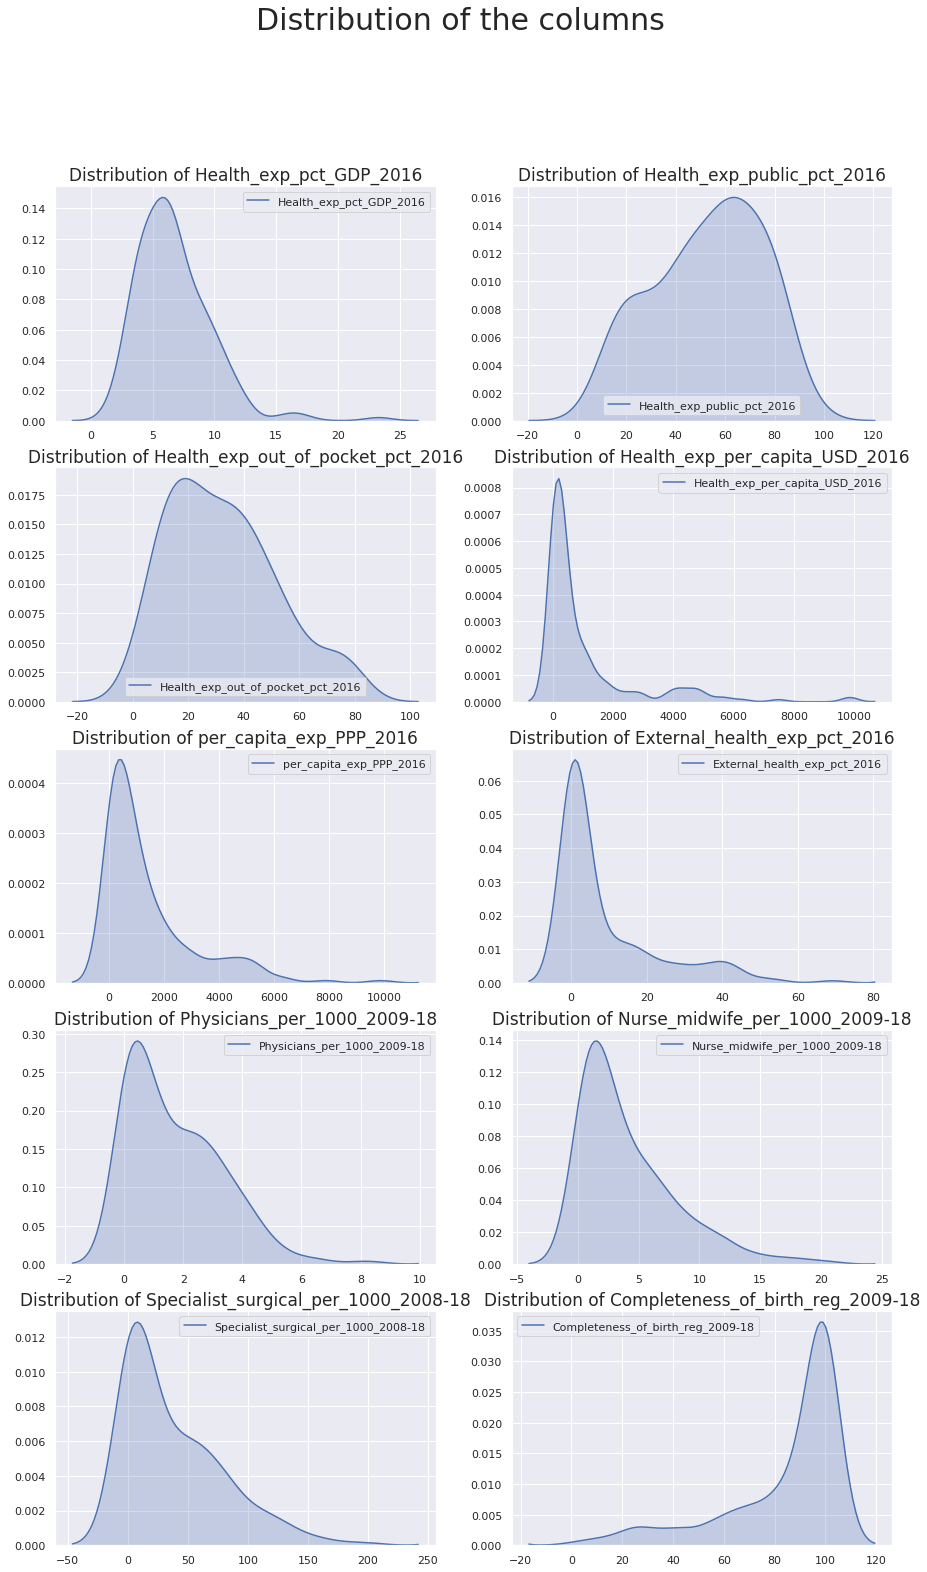

In [11]:
# Check the shape of distributions 
sns.set(style="darkgrid")

fig, axes = plt.subplots(5, 2, figsize=(15, 25))
fig.suptitle('Distribution of the columns' , fontsize=30)

sns.kdeplot(ax=axes[0, 0], data=health_data_df['Health_exp_pct_GDP_2016'], shade=True)
axes[0, 0].set_title('Distribution of Health_exp_pct_GDP_2016' , fontsize=17)

sns.kdeplot(ax=axes[0, 1], data=health_data_df['Health_exp_public_pct_2016'], shade=True)
axes[0, 1].set_title('Distribution of Health_exp_public_pct_2016' , fontsize=17)

sns.kdeplot(ax=axes[1, 0], data=health_data_df['Health_exp_out_of_pocket_pct_2016'], shade=True)
axes[1, 0].set_title('Distribution of Health_exp_out_of_pocket_pct_2016', fontsize=17)

sns.kdeplot(ax=axes[1, 1], data=health_data_df['Health_exp_per_capita_USD_2016'], shade=True)
axes[1, 1].set_title('Distribution of Health_exp_per_capita_USD_2016', fontsize=17)

sns.kdeplot(ax=axes[2, 0], data=health_data_df['per_capita_exp_PPP_2016'], shade=True)
axes[2, 0].set_title('Distribution of per_capita_exp_PPP_2016', fontsize=17)

sns.kdeplot(ax=axes[2, 1], data=health_data_df['External_health_exp_pct_2016'], shade=True)
axes[2, 1].set_title('Distribution of External_health_exp_pct_2016', fontsize=17)

sns.kdeplot(ax=axes[3, 0], data=health_data_df['Physicians_per_1000_2009-18'], shade=True)
axes[3, 0].set_title('Distribution of Physicians_per_1000_2009-18', fontsize=17)

sns.kdeplot(ax=axes[3, 1], data=health_data_df['Nurse_midwife_per_1000_2009-18'], shade=True)
axes[3, 1].set_title('Distribution of Nurse_midwife_per_1000_2009-18', fontsize=17)

sns.kdeplot(ax=axes[4, 0], data=health_data_df['Specialist_surgical_per_1000_2008-18'], shade=True)
axes[4, 0].set_title('Distribution of Specialist_surgical_per_1000_2008-18', fontsize=17)

sns.kdeplot(ax=axes[4, 1], data=health_data_df['Completeness_of_birth_reg_2009-18'], shade=True)
axes[4, 1].set_title('Distribution of Completeness_of_birth_reg_2009-18', fontsize=17)

We can see that most of the columns are skewed (either to the right or to the left).

We can hence replace the null values in those columns with the median of the respective columns.

In [12]:
# Replace the missing values with the median of each column
health_data_cols = health_data_df.select_dtypes(exclude='object').columns

for column in health_data_cols:
    health_data_df[column].fillna(health_data_df[column].median(), inplace=True)

health_data_df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3
1,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4
2,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0
3,Andorra,10.4,49.1,41.7,3834.7,4978.7,1.7,3.3,4.0,83.1,100.0
4,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,23.6,25.0


In [13]:
# Confirm that the nulls have been dealt with
health_data_df.isnull().sum()

World_Bank_Name                         0
Health_exp_pct_GDP_2016                 0
Health_exp_public_pct_2016              0
Health_exp_out_of_pocket_pct_2016       0
Health_exp_per_capita_USD_2016          0
per_capita_exp_PPP_2016                 0
External_health_exp_pct_2016            0
Physicians_per_1000_2009-18             0
Nurse_midwife_per_1000_2009-18          0
Specialist_surgical_per_1000_2008-18    0
Completeness_of_birth_reg_2009-18       0
dtype: int64

### Visualize patterns and correlations

We create a heatmap to quickly visualize patterns and correlations.

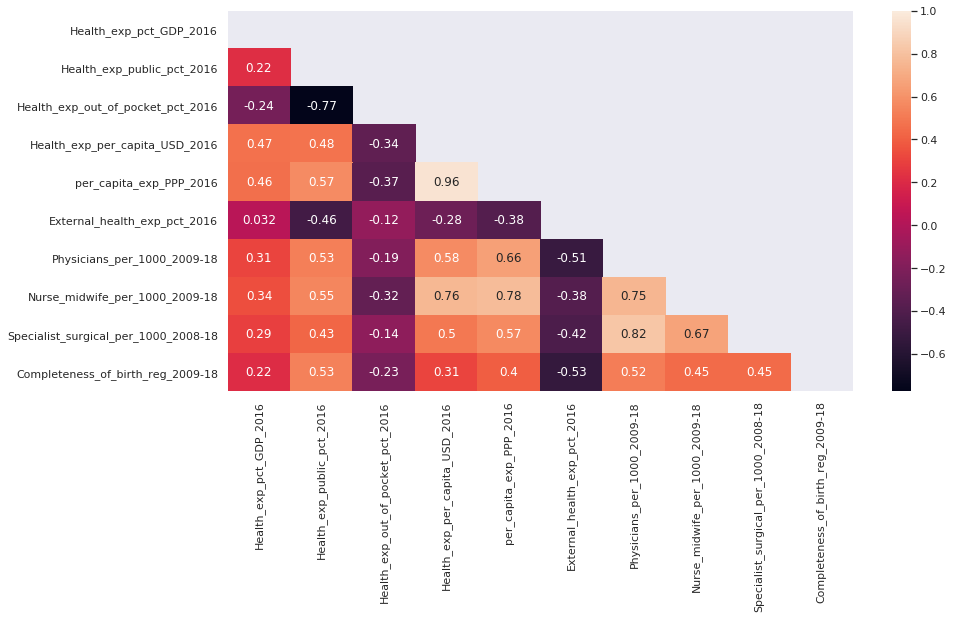

In [14]:
# Create the correlation matrix
corr = health_data_df.corr()

# Generate a mask for the upper triangle - to remove the repetetive values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
plt.figure(figsize=(14,7))
sns.heatmap(corr, mask=mask, annot=True)

Highly correlated features do not bring new information but increase complexity.

Remove one of the 2 features with a high correlation.

In [15]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = health_data_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

for col in to_drop:
    print('We drop column named: ', col)

# Drop the features in the to_drop list
health_data_df = health_data_df.drop(to_drop, axis=1)

print("\nThe reduced dataframe has {} columns.".format(health_data_df.shape[1]))
print("\nThe remaining columns are: {}".format(health_data_df.columns))

We drop column named:  Health_exp_per_capita_USD_2016

The reduced dataframe has 10 columns.

The remaining columns are: Index(['World_Bank_Name', 'Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'per_capita_exp_PPP_2016', 'External_health_exp_pct_2016',
       'Physicians_per_1000_2009-18', 'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_1000_2008-18',
       'Completeness_of_birth_reg_2009-18'],
      dtype='object')


# Visualizations

## Visualize total health expenditure as a percentage of GDP (Health_exp_pct_GDP_2016)

By getting countries' total health expenditure as a percentage of their GDP, the resulting value becomes comparable across countries.

The assumption would therefore be:
- Countries with higher values in *Health_exp_pct_GDP_2016* column spend more on health.
- Countries with lower values in *Health_exp_pct_GDP_2016* column spend less on health.

In [16]:
# Sort the dataset based on Health_exp_pct_GDP_2016
Health_exp_pct_GDP_2016 = health_data_df.sort_values(by = 'Health_exp_pct_GDP_2016', ascending = False)
Health_exp_pct_GDP_2016.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
118,Marshall Islands,23.3,52.6,9.0,934.4,35.4,0.5,3.5,15.9,84.0
199,United States,17.1,81.8,11.1,9869.7,0.0,2.6,8.6,54.7,100.0
163,Sierra Leone,16.5,11.2,41.6,244.0,41.0,0.0,1.0,0.1,81.0
194,Tuvalu,15.5,84.5,0.7,601.0,12.2,0.9,3.8,26.1,96.0
122,"Micronesia, Fed. Sts.",12.6,27.8,2.6,431.6,69.2,0.2,3.3,7.0,96.0


[Text(0, 0, 'Lao PDR'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Brunei Darussalam'),
 Text(0, 0, 'Papua New Guinea'),
 Text(0, 0, 'Monaco')]

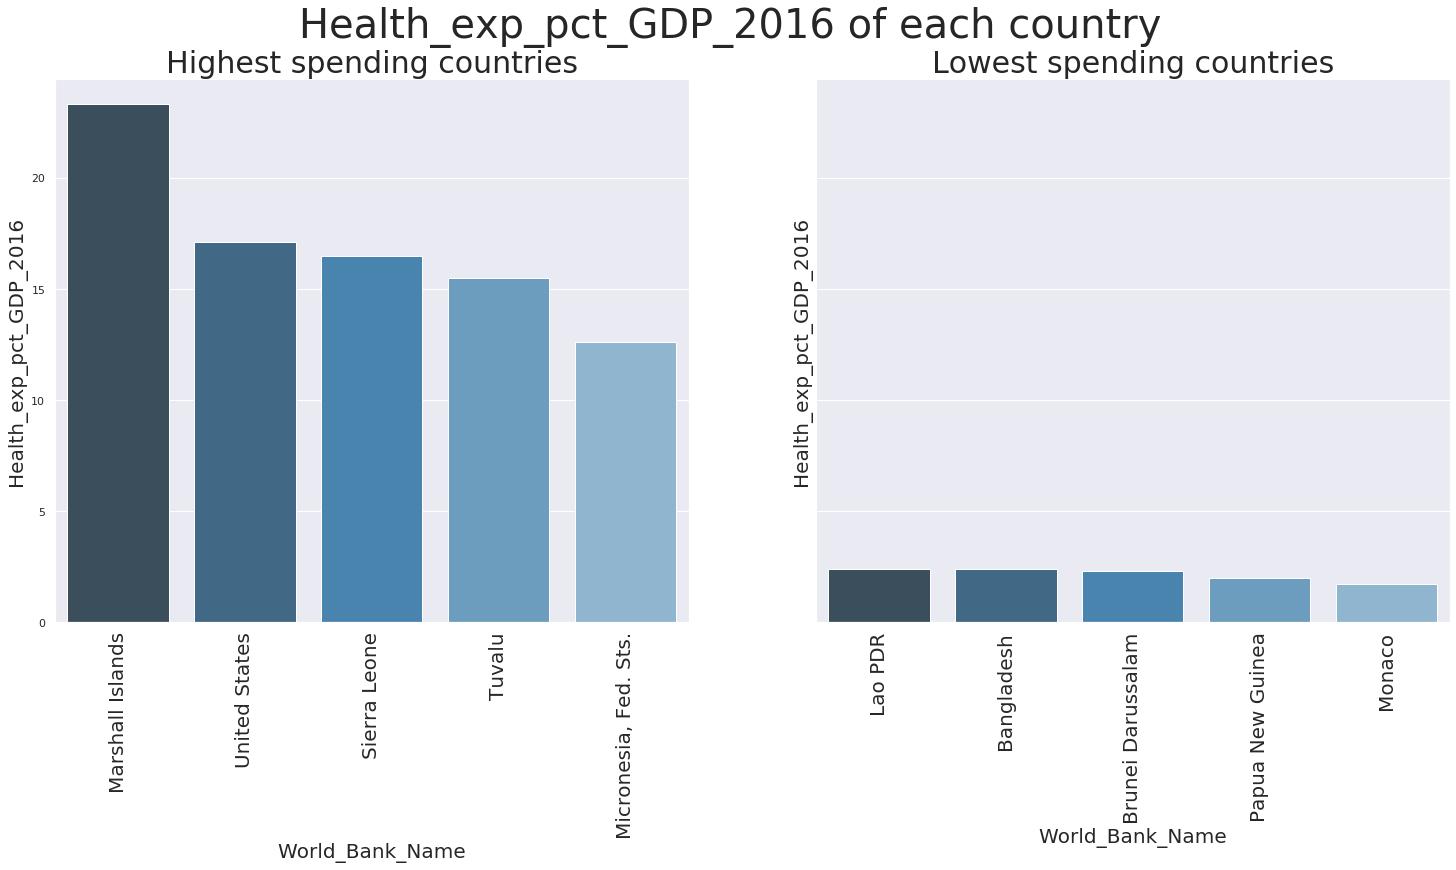

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(25,10), sharey=True)
fig.suptitle('Health_exp_pct_GDP_2016 of each country', fontsize=40)

sns.barplot(ax=axes[0], x=Health_exp_pct_GDP_2016['World_Bank_Name'].head(), y=Health_exp_pct_GDP_2016['Health_exp_pct_GDP_2016'].head(), palette="Blues_d")
axes[0].set_xlabel('World_Bank_Name', fontsize=20)
axes[0].set_ylabel('Health_exp_pct_GDP_2016', fontsize=20)
axes[0].set_title('Highest spending countries', fontsize=30)
axes[0].set_xticklabels(Health_exp_pct_GDP_2016['World_Bank_Name'].head(), fontsize=20, rotation=90)

sns.barplot(ax=axes[1], x=Health_exp_pct_GDP_2016['World_Bank_Name'].tail(), y=Health_exp_pct_GDP_2016['Health_exp_pct_GDP_2016'].tail(), palette="Blues_d")
axes[1].set_xlabel('World_Bank_Name', fontsize=20)
axes[1].set_ylabel('Health_exp_pct_GDP_2016', fontsize=20)
axes[1].set_title('Lowest spending countries', fontsize=30)
axes[1].set_xticklabels(Health_exp_pct_GDP_2016['World_Bank_Name'].tail(), fontsize=20, rotation=90)

### Findings

**Highest spenders on health care (as a percentage of their GDP):**
-  Marshall Islands
- United States
- Sierra Leone
- Tuvalu
- Micronesia. Fed. Sts
    
**Lowest spenders on health care (as a percentage of their GDP):**
- Lao PDR
- Bangladesh
- Brunei Darussalam
- Papua New Guinea 
- Monaco

### Visualize who spends the money

Of course there is more than one way to spend money on healthcare. 

We'd like to know, among the highest spending and lowest spending countries, does government spend more? or is it out of pocket expenditure? or external?

In [18]:
# get Health_exp_public_pct_2016, Health_exp_out_of_pocket_pct_2016 and External_health_exp_pct_2016 
# as a percentage of GDP 
Health_exp_pct_GDP = pd.DataFrame()

Health_exp_pct_GDP['Health_exp_public_pct_GDP'] =  (Health_exp_pct_GDP_2016['Health_exp_public_pct_2016'] * Health_exp_pct_GDP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'] = (Health_exp_pct_GDP_2016['Health_exp_out_of_pocket_pct_2016'] * Health_exp_pct_GDP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP['External_health_exp_pct_GDP'] = (Health_exp_pct_GDP_2016['External_health_exp_pct_2016'] * Health_exp_pct_GDP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP.head()

,Health_exp_public_pct_GDP,Health_exp_out_of_pocket_pct_GDP,External_health_exp_pct_GDP
118,12.2558,2.0970,8.2482
199,13.9878,1.8981,0.0000
163,1.8480,6.8640,6.7650
194,13.0975,0.1085,1.8910
122,3.5028,0.3276,8.7192


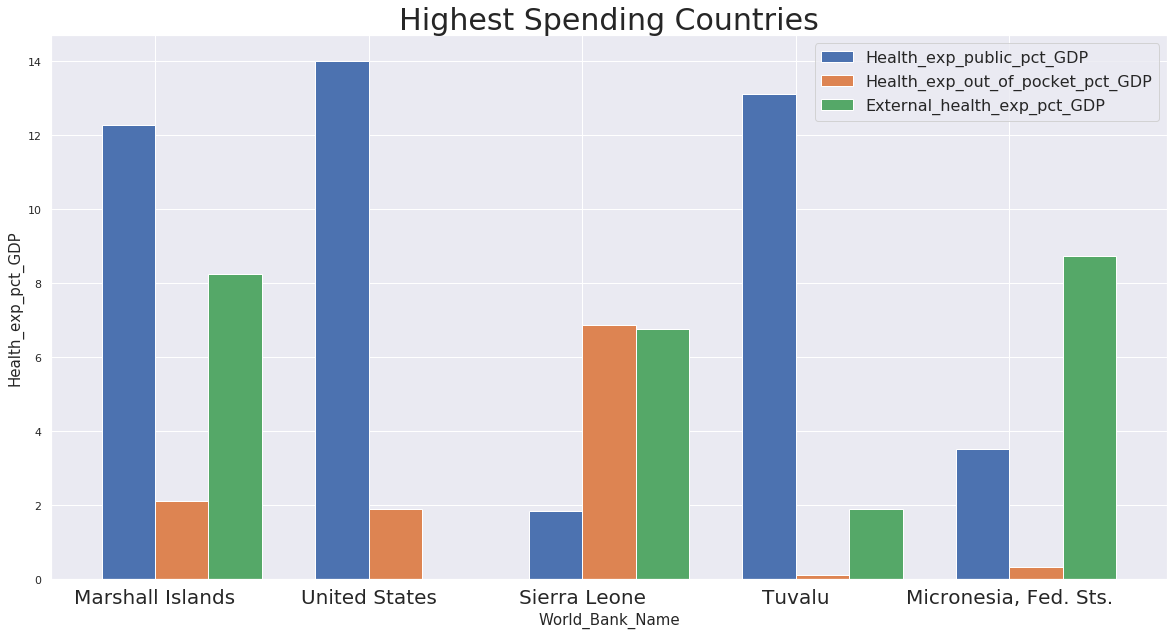

In [19]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = Health_exp_pct_GDP['Health_exp_public_pct_GDP'].head()
# Specify the values of orange bars (height)
orange_bar = Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'].head()
# Specify the values of green bars (height)
green_bar = Health_exp_pct_GDP['External_health_exp_pct_GDP'].head()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(20,10))

# Width of a bar 
width = 0.25       

# Plotting
plt.bar(ind, blue_bar , width, label='Health_exp_public_pct_GDP')
plt.bar(ind + width, orange_bar, width, label='Health_exp_out_of_pocket_pct_GDP')
plt.bar(ind + width + width, green_bar, width, label='External_health_exp_pct_GDP')

plt.xlabel('World_Bank_Name', fontsize=15)
plt.ylabel('Health_exp_pct_GDP', fontsize=15)
plt.title('Highest Spending Countries', fontsize=30)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, Health_exp_pct_GDP_2016['World_Bank_Name'].head(), fontsize=20)

# Finding the best position for legends and putting it
plt.legend(loc='best', prop={'size': 16})
plt.show()

### Findings (Who spends on healthcare in Highest spending countries?)

Among the Highest spenders on Healthcare (as a percentage of their GDP), we note that 3 out of 5 have their health expenditures funded from domestic public sources (**Health_exp_public_pct_GDP**).

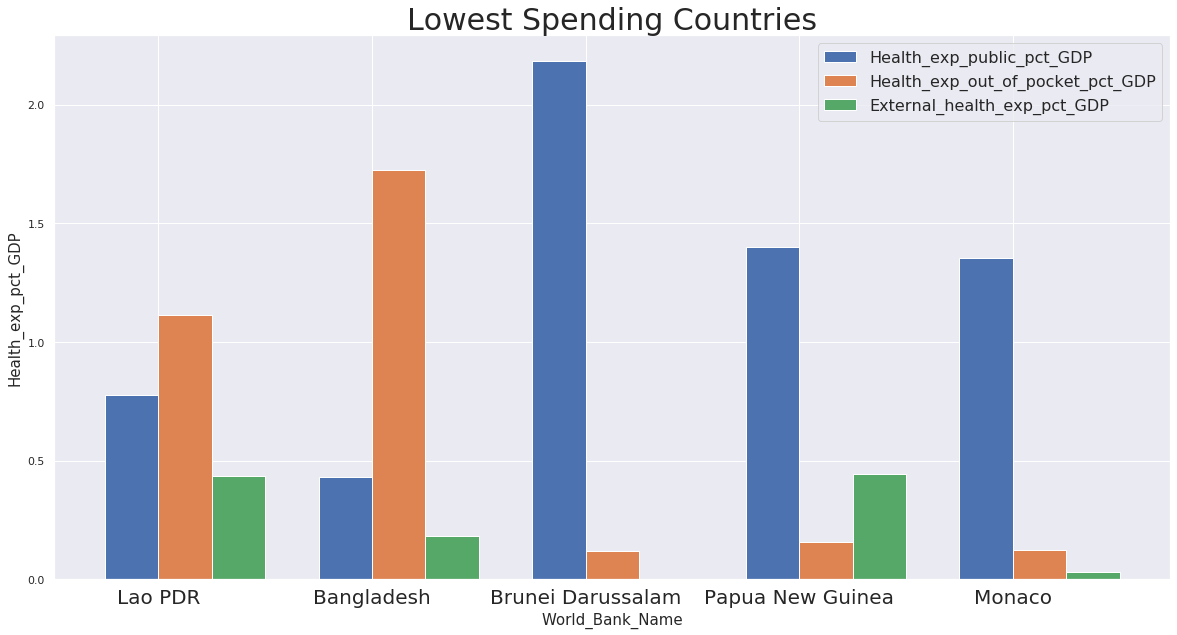

In [20]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = Health_exp_pct_GDP['Health_exp_public_pct_GDP'].tail()
# Specify the values of orange bars (height)
orange_bar = Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'].tail()
# Specify the values of green bars (height)
green_bar = Health_exp_pct_GDP['External_health_exp_pct_GDP'].tail()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(20,10))

# Width of a bar 
width = 0.25       

# Plotting
plt.bar(ind, blue_bar , width, label='Health_exp_public_pct_GDP')
plt.bar(ind + width, orange_bar, width, label='Health_exp_out_of_pocket_pct_GDP')
plt.bar(ind + width + width, green_bar, width, label='External_health_exp_pct_GDP')

plt.xlabel('World_Bank_Name', fontsize=15)
plt.ylabel('Health_exp_pct_GDP', fontsize=15)
plt.title('Lowest Spending Countries', fontsize=30)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, Health_exp_pct_GDP_2016['World_Bank_Name'].tail(), fontsize=20)

# Finding the best position for legends and putting it
plt.legend(loc='best', prop={'size': 16})
plt.show()

### Findings (Who spends on healthcare in Lowest spending countries?)

Among the Lowest spenders on Healthcare (as a percentage of their GDP), we note that 3 out of 5 have their health expenditures funded from domestic public sources (**Health_exp_public_pct_GDP**).

### General Findings

We can make an assumption that in most countries, health expenditures are mainly funded from domestic public sources (**Health_exp_public_pct_GDP**).

## Visualize average amount of money spent on health by each citizen (per_capita_exp_PPP_2016)

Purchasing Power Parity ensures the per capita expenditure in health care is comparable between countries.

Per capita expenditure in USD may be misleading since the currency may be manipulated. Additionally, using GDP calculated in a Norminal way rather than PPP would also be misleading due to the same reason (manipulation of currency).

The assumption would therefore be:
- Countries with higher values in *per_capita_exp_PPP_2016* column spend more on health.
- Countries with lower values in *per_capita_exp_PPP_2016* column spend less on health.

In [21]:
# Sort the dataset based on Health_exp_pct_GDP_2016
per_capita_exp_PPP_2016 = health_data_df.sort_values(by = 'per_capita_exp_PPP_2016', ascending = False)
per_capita_exp_PPP_2016.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
199,United States,17.1,81.8,11.1,9869.7,0.0,2.6,8.6,54.7,100.0
181,Switzerland,12.2,62.8,29.6,7867.4,1.7,4.2,17.3,94.8,100.0
111,Luxembourg,6.2,81.2,11.2,6374.2,1.2,3.0,12.3,80.8,100.0
140,Norway,10.5,85.1,14.5,6203.5,0.0,4.6,18.1,67.2,100.0
70,Germany,11.1,84.7,12.4,5463.3,1.7,4.2,13.2,108.0,100.0


[Text(0, 0, 'Niger'),
 Text(0, 0, 'Eritrea'),
 Text(0, 0, 'Burundi'),
 Text(0, 0, 'Congo, Dem. Rep.'),
 Text(0, 0, 'Central African Republic')]

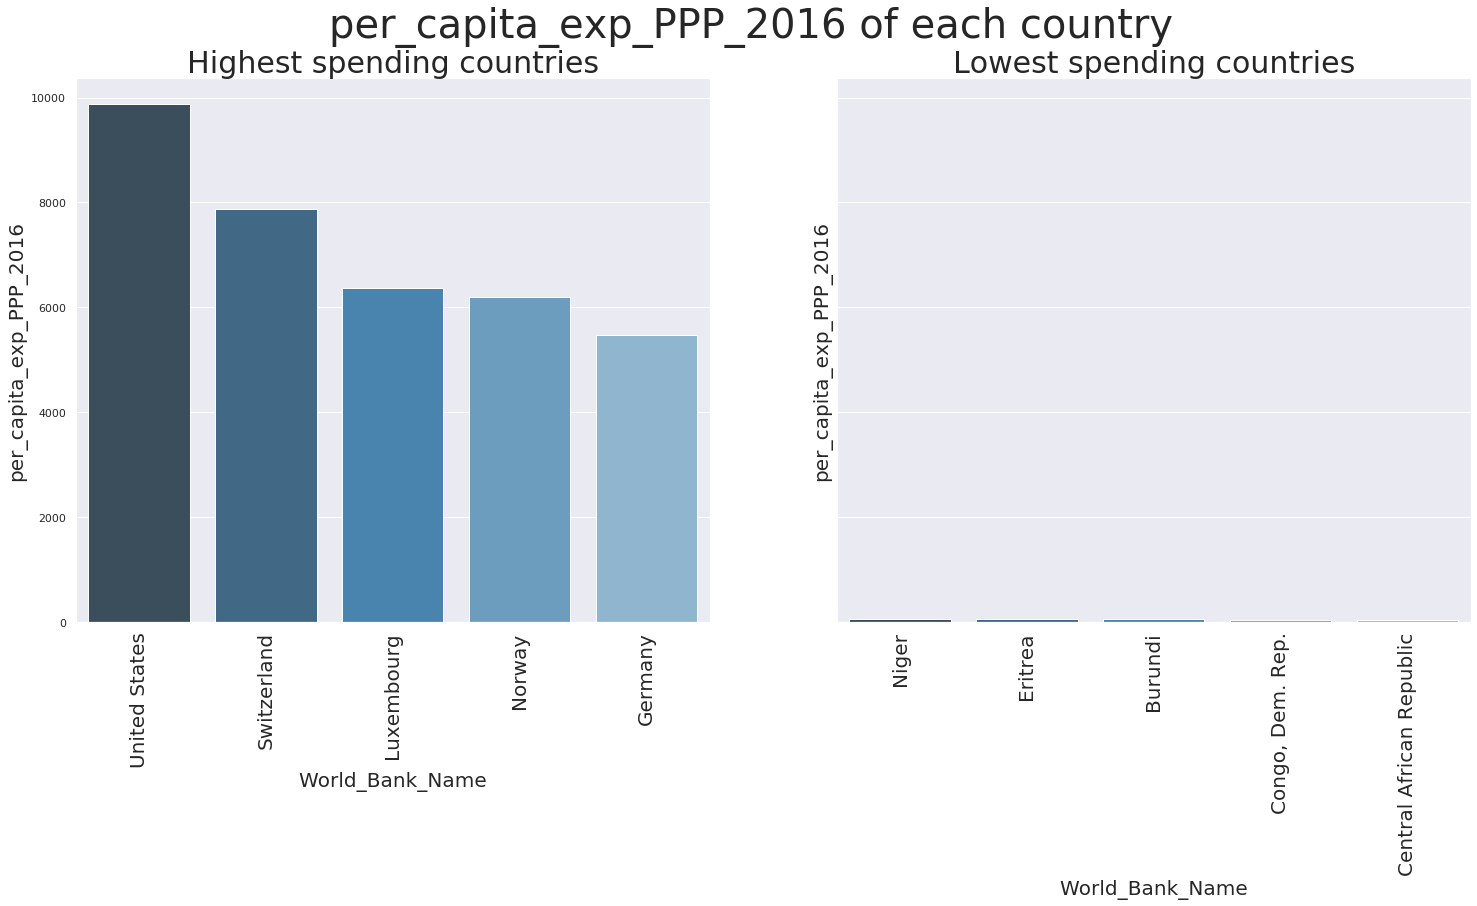

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(25,10), sharey=True)
fig.suptitle('per_capita_exp_PPP_2016 of each country', fontsize=40)

sns.barplot(ax=axes[0], x=per_capita_exp_PPP_2016['World_Bank_Name'].head(), y=per_capita_exp_PPP_2016['per_capita_exp_PPP_2016'].head(), palette="Blues_d")
axes[0].set_xlabel('World_Bank_Name', fontsize=20)
axes[0].set_ylabel('per_capita_exp_PPP_2016', fontsize=20)
axes[0].set_title('Highest spending countries', fontsize=30)
axes[0].set_xticklabels(per_capita_exp_PPP_2016['World_Bank_Name'].head(), fontsize=20, rotation=90)

sns.barplot(ax=axes[1], x=per_capita_exp_PPP_2016['World_Bank_Name'].tail(), y=per_capita_exp_PPP_2016['per_capita_exp_PPP_2016'].tail(), palette="Blues_d")
axes[1].set_xlabel('World_Bank_Name', fontsize=20)
axes[1].set_ylabel('per_capita_exp_PPP_2016', fontsize=20)
axes[1].set_title('Lowest spending countries', fontsize=30)
axes[1].set_xticklabels(per_capita_exp_PPP_2016['World_Bank_Name'].tail(), fontsize=20, rotation=90)

### Findings

**Highest spenders on health care (per_capita_exp_PPP_2016):**
- United States
- Switzerland
- Luxembourg
- Norway
- Gemany
    
**Lowest spenders on health care (per_capita_exp_PPP_2016):**
- Niger
- Eritrea
- Burundi
- Congo, Dem. Rep.
- Central African Republic

Only United States appeared in both findings. 

### Visualize who spends the money

Of course there is more than one way to spend money on healthcare. 

We'd like to know, among the highest spending and lowest spending countries, does government spend more? or is it out of pocket expenditure? or external?

In [23]:
# get Health_exp_public_pct_2016, Health_exp_out_of_pocket_pct_2016 and External_health_exp_pct_2016 
# as a percentage of GDP 
Health_exp_pct_GDP = pd.DataFrame()

Health_exp_pct_GDP['Health_exp_public_pct_GDP'] =  (per_capita_exp_PPP_2016['Health_exp_public_pct_2016'] * per_capita_exp_PPP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'] = (per_capita_exp_PPP_2016['Health_exp_out_of_pocket_pct_2016'] * per_capita_exp_PPP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP['External_health_exp_pct_GDP'] = (per_capita_exp_PPP_2016['External_health_exp_pct_2016'] * per_capita_exp_PPP_2016['Health_exp_pct_GDP_2016']) / 100

Health_exp_pct_GDP.head()

,Health_exp_public_pct_GDP,Health_exp_out_of_pocket_pct_GDP,External_health_exp_pct_GDP
199,13.9878,1.8981,0.0000
181,7.6616,3.6112,0.2074
111,5.0344,0.6944,0.0744
140,8.9355,1.5225,0.0000
70,9.4017,1.3764,0.1887


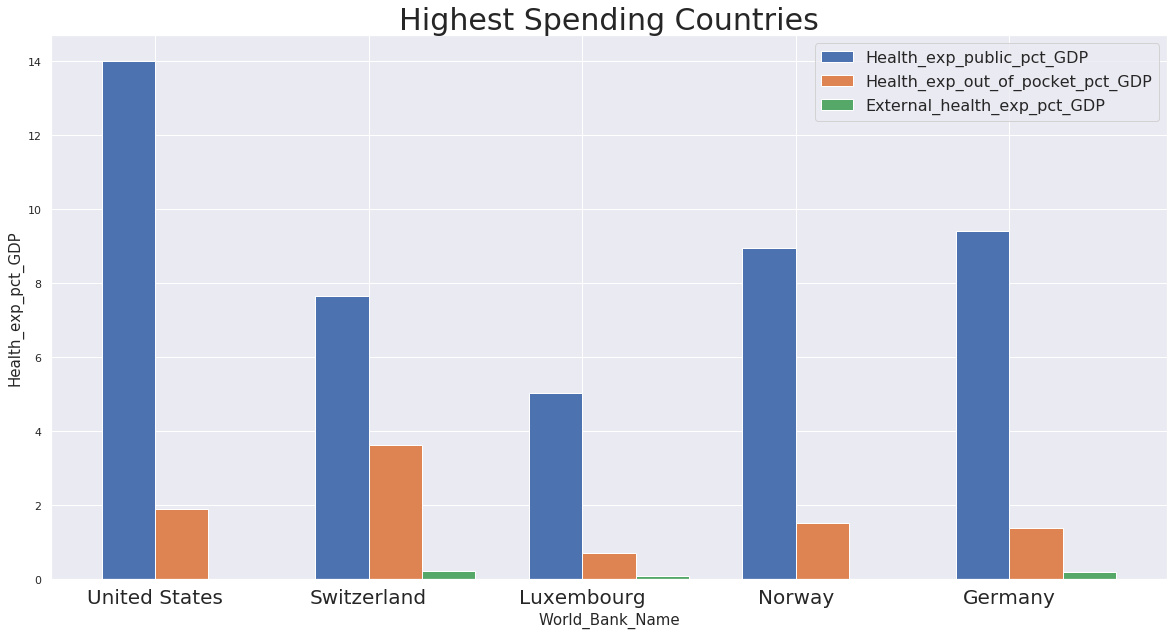

In [24]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = Health_exp_pct_GDP['Health_exp_public_pct_GDP'].head()
# Specify the values of orange bars (height)
orange_bar = Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'].head()
# Specify the values of green bars (height)
green_bar = Health_exp_pct_GDP['External_health_exp_pct_GDP'].head()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(20,10))

# Width of a bar 
width = 0.25       

# Plotting
plt.bar(ind, blue_bar , width, label='Health_exp_public_pct_GDP')
plt.bar(ind + width, orange_bar, width, label='Health_exp_out_of_pocket_pct_GDP')
plt.bar(ind + width + width, green_bar, width, label='External_health_exp_pct_GDP')

plt.xlabel('World_Bank_Name', fontsize=15)
plt.ylabel('Health_exp_pct_GDP', fontsize=15)
plt.title('Highest Spending Countries', fontsize=30)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, per_capita_exp_PPP_2016['World_Bank_Name'].head(), fontsize=20)

# Finding the best position for legends and putting it
plt.legend(loc='best', prop={'size': 16})
plt.show()

### Findings (Who spends on healthcare in Highest spending countries?)

Among the Highest spenders on Healthcare (per_capita_exp_PPP_2016), we note that 5 out of 5 have their health expenditures funded from domestic public sources (**Health_exp_public_pct_GDP**).

Followed by **Health_exp_out_of_pocket_pct_GDP**

There's little form **External_health_exp_GDP**

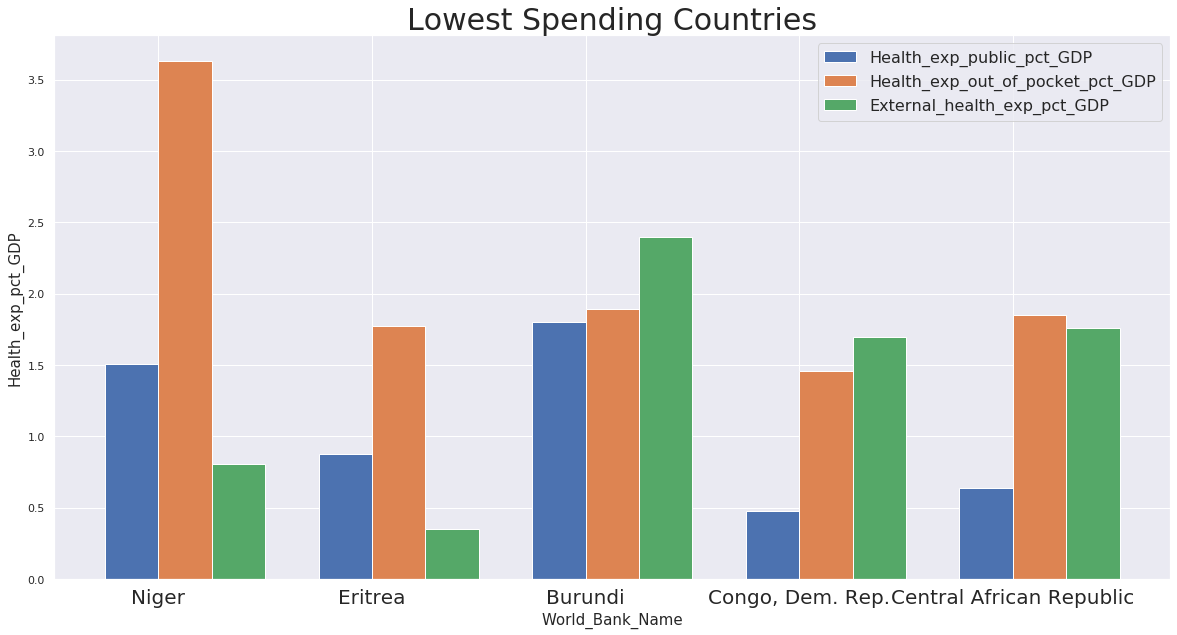

In [25]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = Health_exp_pct_GDP['Health_exp_public_pct_GDP'].tail()
# Specify the values of orange bars (height)
orange_bar = Health_exp_pct_GDP['Health_exp_out_of_pocket_pct_GDP'].tail()
# Specify the values of green bars (height)
green_bar = Health_exp_pct_GDP['External_health_exp_pct_GDP'].tail()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(20,10))

# Width of a bar 
width = 0.25       

# Plotting
plt.bar(ind, blue_bar , width, label='Health_exp_public_pct_GDP')
plt.bar(ind + width, orange_bar, width, label='Health_exp_out_of_pocket_pct_GDP')
plt.bar(ind + width + width, green_bar, width, label='External_health_exp_pct_GDP')

plt.xlabel('World_Bank_Name', fontsize=15)
plt.ylabel('Health_exp_pct_GDP', fontsize=15)
plt.title('Lowest Spending Countries', fontsize=30)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, per_capita_exp_PPP_2016['World_Bank_Name'].tail(), fontsize=20)

# Finding the best position for legends and putting it
plt.legend(loc='best', prop={'size': 16})
plt.show()

### Findings (Who spends on healthcare in Lowest spending countries?)

Among the Lowest spenders on Healthcare (per_capita_exp_PPP_2016), we note that 3 out of 5 have their health expenditures funded from **Health_exp_out_of_pocket_pct_GDP**.

Funding from **External_health_exp_GDP** follows closely. 

### General Findings

We can make an assumption that in high spending countries, health expenditures are mainly funded from domestic public sources (**Health_exp_public_pct_GDP**).

Whereas in low spending countries, health expenditures are mainly funded from **Health_exp_out_of_pocket_pct_GDP** and **External_health_exp_GDP**.

# KNN Modelling

## Which column gives a better estimate of how much each country spends on health?

This could give us a target variable for use.

There were initially 14 columns in total. 

We dropped 4 (*Country_Region*, *Province_State*, *Health_exp_per_capita_USD_2016* and *Completeness_of_death_reg_2008-16*) due to nulls and correlation.

We're left with 10 columns to choose from.

The following columns do not give information on health expenditure of a country hence may not be considered:
- *World_Bank_Name*
- *Physicians_per_1000_2009-18*
- *Nurse_midwife_per_1000_2009-18*
- *Specialist_surgical_per_1000_2008-18* 
- *Completeness_of_birth_reg_2009-18*
- *Completeness_of_death_reg_2008-16*  

We're now left with 4 columns.

The following columns represent different aspects that make up the total health expenditure. Together, they're able to give a better estimate of the total health expenditure. However, individually they may not be a good measure of a country's health expenditure hence may not be considered.
- *Health_exp_public_pct_2016*
- *Health_exp_out_of_pocket_pct_2016*
- *External_health_exp_pct_2016*

We're now left with 1 column, *per_capita_exp_PPP_2016*.

It explains how much each citizen spends on health care (on average). PPP is a better measure than using GDP and a  single currency (e.g. USD) for comparison. This is because currencies can be manipulated.

### Represent *per_capita_exp_PPP_2016* column as a category 

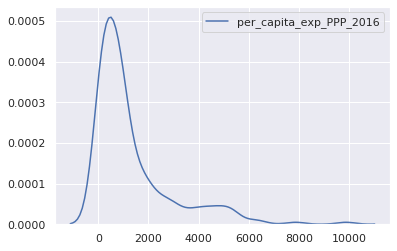

In [26]:
# check the distribution 
sns.kdeplot(health_data_df['per_capita_exp_PPP_2016'])

In [27]:
# mesures of central tendency
print('Mean: ', health_data_df['per_capita_exp_PPP_2016'].mean())
print('Median: ', health_data_df['per_capita_exp_PPP_2016'].median())
print('Mode: ', health_data_df['per_capita_exp_PPP_2016'].mode()[0])

Mean:  1340.4704761904768
Median:  782.5
Mode:  782.5


The mean is greater than the median, hence positvely/right skewed.

We may use the median for categorization.

Create a column for spending category (high or low).

1 in the *spending category* means high spender whereas 0 means low spender.

In [28]:
# categorize based on median
def categorize_per_capita_exp_PPP_2016(row):
    if row > 782.5:
        row = 1
    else:
        row = 0
    return row
# create a column for spending category (high or low)
health_data_df['Spending_category'] = health_data_df['per_capita_exp_PPP_2016'].apply(categorize_per_capita_exp_PPP_2016)
# drop per_capita_exp_PPP_2016 
health_data_df.drop('per_capita_exp_PPP_2016', axis=1, inplace=True)
health_data_df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Spending_category
0,Afghanistan,10.2,5.1,77.4,17.5,0.3,0.3,0.0,42.3,0
1,Albania,6.7,41.4,58.0,0.7,1.2,3.6,11.6,98.4,0
2,Algeria,6.6,67.7,30.9,0.0,1.8,2.2,12.1,100.0,1
3,Andorra,10.4,49.1,41.7,1.7,3.3,4.0,83.1,100.0,1
4,Angola,2.9,44.1,35.2,3.6,0.2,1.3,23.6,25.0,0


In [29]:
health_data_df.shape

(210, 10)

In [30]:
# drop World_Bank_Name
health_data_df.drop('World_Bank_Name', axis=1, inplace=True)
health_data_df.head()

,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Spending_category
0,10.2,5.1,77.4,17.5,0.3,0.3,0.0,42.3,0
1,6.7,41.4,58.0,0.7,1.2,3.6,11.6,98.4,0
2,6.6,67.7,30.9,0.0,1.8,2.2,12.1,100.0,1
3,10.4,49.1,41.7,1.7,3.3,4.0,83.1,100.0,1
4,2.9,44.1,35.2,3.6,0.2,1.3,23.6,25.0,0


In [31]:
health_data_df.shape

(210, 9)

In [32]:
# Get dependent and independent variables
y = health_data_df['Spending_category']
print(y[:5])
X = health_data_df.drop('Spending_category', axis=1)
X.head()

0    0
1    0
2    1
3    1
4    0
Name: Spending_category, dtype: int64


,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
0,10.2,5.1,77.4,17.5,0.3,0.3,0.0,42.3
1,6.7,41.4,58.0,0.7,1.2,3.6,11.6,98.4
2,6.6,67.7,30.9,0.0,1.8,2.2,12.1,100.0
3,10.4,49.1,41.7,1.7,3.3,4.0,83.1,100.0
4,2.9,44.1,35.2,3.6,0.2,1.3,23.6,25.0


In [33]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=99, stratify=y)

### Normalize and scale the data

This is because most machine learning models assume the features are on the same scale and are normally distributed. Tree based models are however an exception.

We'll fit the transformer on train data then use it to transform both the train and test data. This helps avoid the train test contamination which may be caused by fitting the transformer on all the data.

In [34]:
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the X training data
pow_trans.fit(X_train)

# Apply the power transform to the X train and X test data
X_train_normalized = pow_trans.transform(X_train)
X_test_normalized = pow_trans.transform(X_test)

# Get the normalized dataframes
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns, index=X_train.index)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns, index=X_test.index)

### create base model

In [35]:
# Create a k-NN classifier 
knn = KNeighborsClassifier()

# pandas dataframe to store train and test scores
scores_df = pd.DataFrame(columns=['Train score', 'Test score'], index=['KNeighborsClassifier'])

train_scores = []
test_scores = []

# define function to calculate train and test scores
def get_scores(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model.fit(X_train, y_train)
    # compute accuracy on the training set
    train_scores.append(model.score(X_train, y_train))
    # compute accuracy on the testing set
    test_scores.append(model.score(X_test, y_test))
    scores_df['Train score'] = train_scores
    scores_df['Test score'] = test_scores
    # empty the lists since we'll reuse them
    train_scores.clear()
    test_scores.clear()
    return scores_df

get_scores(knn, X_train_normalized, X_test_normalized)

,Train score,Test score
KNeighborsClassifier,0.916667,0.880952


### Cross validation

We might have been lucky when splitting.

To evaluate our model's true performance, we perform cross validation.

In [36]:
# Train the transform on the X  data
pow_trans.fit(X)

# Apply the power transform to the X data
X_normalized = pow_trans.transform(X)

# Get the normalized dataframes
X_normalized = pd.DataFrame(X_normalized, columns=X.columns, index=X.index)

# cross validation
cv_scores = cross_val_score(knn, X_normalized, y, cv=5)
cv_scores.mean()

0.8333333333333334

We notice that the score reduces. 

Relying on our previous scores would have thus been misleading.

Let's try to improve on the cross validated score.

### Hyperparameter Tuning

Let's try to get the best values for the model's hyperparameters e.g. n_neighbors

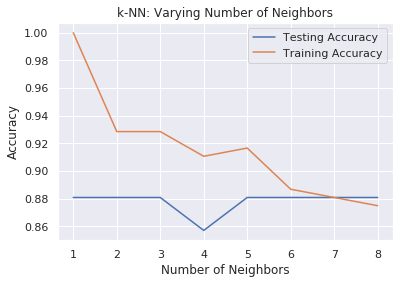

In [37]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train_normalized, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_normalized, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_normalized, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

The best value for the model's *n_neighbors* hyperparameter is 8 (test accuracy).

We therefore re-initialize the model with the best value for the *n_neighbors* hyperparameter.

In [38]:
# cross validate the tuned model
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=8), X_normalized, y, cv=5)
cv_scores.mean()

0.8476190476190476

The model's cross validated accuracy increases.

### Evaluate model's performance

Accuracy is however not always an informative metric when measuring a classifier's perfomance.

This is because class imbalance in a dataset makes accuracy as a measure of model performance useless.

A confusion matrix helps you get a better understanding of your model's performance.

In [39]:
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors = 8)

# Fit the classifier to the training data
knn.fit(X_train_normalized, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test_normalized)

# Generate confusion matrix 
print(confusion_matrix(y_test, y_pred))

# Generate classification report
print('\n', classification_report(y_test, y_pred))

[[22  1]
 [ 4 15]]

               precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.94      0.79      0.86        19

    accuracy                           0.88        42
   macro avg       0.89      0.87      0.88        42
weighted avg       0.89      0.88      0.88        42



1. Our recall is 0.96, which is good. That means we predicted most high spending countries correctly.

2. Our precision is 0.85, which is not so good. Means we predicted some low spending countries to be high spenders.